In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import datetime

## Data Understanding of 'rt_trips_DB_2018.txt'

### Preliminary check of data

Import 'rt_trips_DB_2018.txt' file.

In [2]:
# reading rt_trips_DB_2018.txt as a dataframe
dftrips = pd.read_csv("rt_trips_DB_2018.txt", sep=';')

In [3]:
dftrips.head(10)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,07-FEB-18 00:00:00,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
6,DB,07-FEB-18 00:00:00,6251760,39,39_21,2,34768,28920,35709.0,28929.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2422850,"
7,DB,07-FEB-18 00:00:00,6262909,16,16_20,1,43936,38880,43721.0,38955.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3045261,"
8,DB,07-FEB-18 00:00:00,6251147,40D,40D_102,1,33558,30600,34540.0,31185.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2837123,"
9,DB,07-FEB-18 00:00:00,6249435,27B,27B_34,2,52682,49800,53281.0,49974.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2329338,"


In [4]:
dftrips.dtypes

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
LINEID              object
ROUTEID             object
DIRECTION            int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR     float64
ACTUALTIME_DEP     float64
BASIN               object
TENDERLOT          float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE                object
dtype: object

In [5]:
#Convert the datatype of dftrips into proper type
categorical_columns = dftrips[['DATASOURCE', 'TRIPID', 'LINEID','ROUTEID','BASIN','NOTE']].columns
continuous_columns = dftrips[['DIRECTION','PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP','TENDERLOT','SUPPRESSED','JUSTIFICATIONID']].columns
datetime_columns = dftrips[['DAYOFSERVICE', 'LASTUPDATE']].columns

for column in categorical_columns:
    dftrips[column] = dftrips[column].astype('category')  

for column in datetime_columns:
    dftrips[column] = pd.to_datetime(dftrips[column]).astype('datetime64')  
    
dftrips.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
LINEID                   category
ROUTEID                  category
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                    category
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

In [6]:
# Print table with categorical statistics
dftrips.select_dtypes(['category']).describe().T

,count,unique,top,freq
DATASOURCE,2182637,1,DB,2182637
TRIPID,2182637,658964,7327038,19
LINEID,2182637,130,46A,76728
ROUTEID,2182637,588,46A_74,37182
BASIN,2182637,1,BasDef,2182637
NOTE,2182637,46690,",2703274,",244


In [7]:
# Print table with continuous statistics
dftrips.select_dtypes(include=['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
DIRECTION,2182637.0,1.504103,0.499983,1.0,1.0,2.0,2.00,2.0
PLANNEDTIME_ARR,2182637.0,55078.747653,17424.822304,18203.0,39683.0,55276.0,69006.00,91680.0
PLANNEDTIME_DEP,2182637.0,51533.292820,17571.637274,16200.0,36000.0,51600.0,65160.00,87600.0
ACTUALTIME_ARR,2045430.0,55062.388280,17338.699154,17546.0,39668.0,55189.0,69019.00,94378.0
ACTUALTIME_DEP,2018086.0,51706.116583,17526.948184,15974.0,36518.0,51618.0,65398.00,97177.0
TENDERLOT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPRESSED,4333.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
JUSTIFICATIONID,4330.0,237554.867667,34585.051789,177856.0,205506.5,233851.5,271506.75,297899.0


In [8]:
# counting the null values.
dftrips.isna().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
LINEID                   0
ROUTEID                  0
DIRECTION                0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR      137207
ACTUALTIME_DEP      164551
BASIN                    0
TENDERLOT          2182637
SUPPRESSED         2178304
JUSTIFICATIONID    2178307
LASTUPDATE               0
NOTE                     0
dtype: int64

In [9]:
#Checking the duplicated values in TRIPID.
dftrips[dftrips['TRIPID'].duplicated()]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
3434,DB,2018-09-26,7772729,63,63_28,2,26822,24300,26479.0,NaN,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",2798256,"
3448,DB,2018-09-26,7774155,122,122_20,2,39038,35400,39032.0,35405.0,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",3313692,"
3474,DB,2018-09-28,7766662,130,130_10,1,56651,54900,56869.0,54947.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2739062,"
3477,DB,2018-09-28,7758239,38,38_14,2,46950,42960,47351.0,43084.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2695497,"
3481,DB,2018-09-28,7773074,29A,29A_15,2,54193,51600,55509.0,51936.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2669204,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,2018-06-26 09:13:13,",3208841,"


In [10]:
dftrips[dftrips.duplicated(['TRIPID','DAYOFSERVICE'])]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


From the above checking, we found out that TRIPID is not the unique ID to identify every single bus trip in dftrips. However, no duplicated TRIPID in a complete service day, indicating that the combination of TRIPID and DAYOFSERVICE is unique.

In [11]:
#Check all the LINEID in dftrips.
dftrips['LINEID'].unique()

['68', '25B', '45A', '25A', '14', ..., '116', '77X', '16D', '33E', '41D']
Length: 130
Categories (130, object): ['68', '25B', '45A', '25A', ..., '77X', '16D', '33E', '41D']

In [12]:
#Check the number of values of each LINEID.
dftrips['LINEID'].value_counts()

46A    76728
145    62730
15     58083
40     56974
39A    55301
       ...  
68X      243
51X      238
16D       84
41D       36
33E       14
Name: LINEID, Length: 130, dtype: int64

In [13]:
#Check the number of values of ROUTEID.
dftrips['ROUTEID'].value_counts()

46A_74     37182
46A_67     35759
145_102    29259
15_17      28471
145_105    27964
           ...  
41B_58         5
140_16         5
14C_10         4
41X_131        4
33D_76         2
Name: ROUTEID, Length: 588, dtype: int64

In [14]:
#Check the number of values of ROUTEID for bus route 1.
dftrips['ROUTEID'].loc[dftrips['LINEID']=='46A'].value_counts()

46A_74    37182
46A_67    35759
46A_66      979
46A_64      397
46A_73      350
          ...  
26_26         0
26_27         0
26_28         0
26_29         0
9_8           0
Name: ROUTEID, Length: 588, dtype: int64

In [15]:
#Check the direction of dftrips
dftrips['DIRECTION'].value_counts()

2    1100273
1    1082364
Name: DIRECTION, dtype: int64

In [16]:
#Check the values of column 'SUPPRESSED'
dftrips['SUPPRESSED'].unique()

array([nan,  0.])

In [17]:
#Check the rows of dftrips when 'SUPPRESSED' == 0('SUPPRESSED' == 0 indicates the planned trips were canceled)
dftrips.loc[dftrips['SUPPRESSED'] == 0]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1783,DB,2018-02-18,6269995,45A,45A_60,1,68767,65700,NaN,65746.0,BasDef,NaN,0.0,194642.0,2018-02-26 11:09:33,",2428302,"
2363,DB,2018-03-16,6399287,41C,41C_78,1,71543,68400,NaN,68643.0,BasDef,NaN,0.0,205589.0,2018-03-26 12:55:43,",1741586,"
3485,DB,2018-09-28,7758815,13,13_72,2,77076,72000,77726.0,NaN,BasDef,NaN,0.0,271333.0,2018-10-18 18:30:27,",2589790,"
3873,DB,2018-02-18,6277942,54A,54A_12,2,56910,54000,NaN,53972.0,BasDef,NaN,0.0,194644.0,2018-02-26 11:09:33,",1752467,"
4353,DB,2018-03-10,6400436,16,16_20,1,66230,61200,NaN,63250.0,BasDef,NaN,0.0,204650.0,2018-03-19 14:54:09,",1892345,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180333,DB,2018-05-15,6756431,40D,40D_101,1,83064,81000,NaN,80899.0,BasDef,NaN,0.0,231822.0,2018-06-26 09:23:03,",2837996,"
2181600,DB,2018-05-14,6761229,46A,46A_67,2,62024,56880,61946.0,NaN,BasDef,NaN,0.0,231784.0,2018-06-26 09:13:13,",3064930,"
2181789,DB,2018-05-15,6759169,66,66_13,2,41797,38100,41937.0,NaN,BasDef,NaN,0.0,231826.0,2018-06-26 09:23:03,",2295846,"
2182138,DB,2018-05-15,6753428,123,123_34,1,60475,56400,60008.0,NaN,BasDef,NaN,0.0,231813.0,2018-06-26 09:23:03,",3218907,"


In [18]:
#Check the values of column 'JUSTIFICATIONID'
dftrips['JUSTIFICATIONID'].value_counts()

203708.0    19
203707.0    15
204297.0    14
203715.0    14
204260.0    10
            ..
232106.0     1
204652.0     1
236117.0     1
291703.0     1
231978.0     1
Name: JUSTIFICATIONID, Length: 3526, dtype: int64

In [19]:
#Check the values of column 'Notes'.
dftrips['NOTE'].value_counts()

,2703274,    244
,1719150,    244
,1741154,    244
,2326480,    244
,2424575,    244
            ... 
,3163889,      1
,3163888,      1
,3163884,      1
,3163883,      1
,3179676,      1
Name: NOTE, Length: 46690, dtype: int64

<AxesSubplot:>

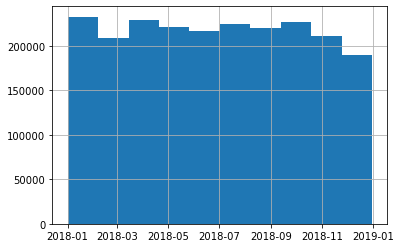

In [20]:
# plotting number of DAYOFSERVICE for dftrips dataset over 2018
dftrips['DAYOFSERVICE'].hist()

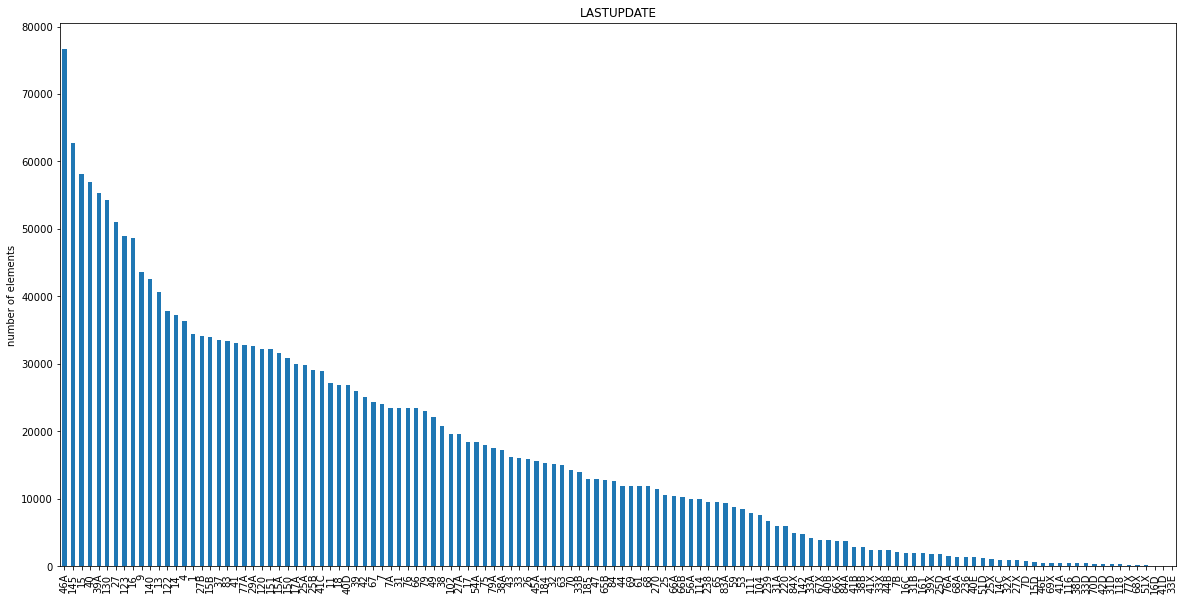

In [21]:
#plotting the number of LINEID for dftrips dataset
f = dftrips['LINEID'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

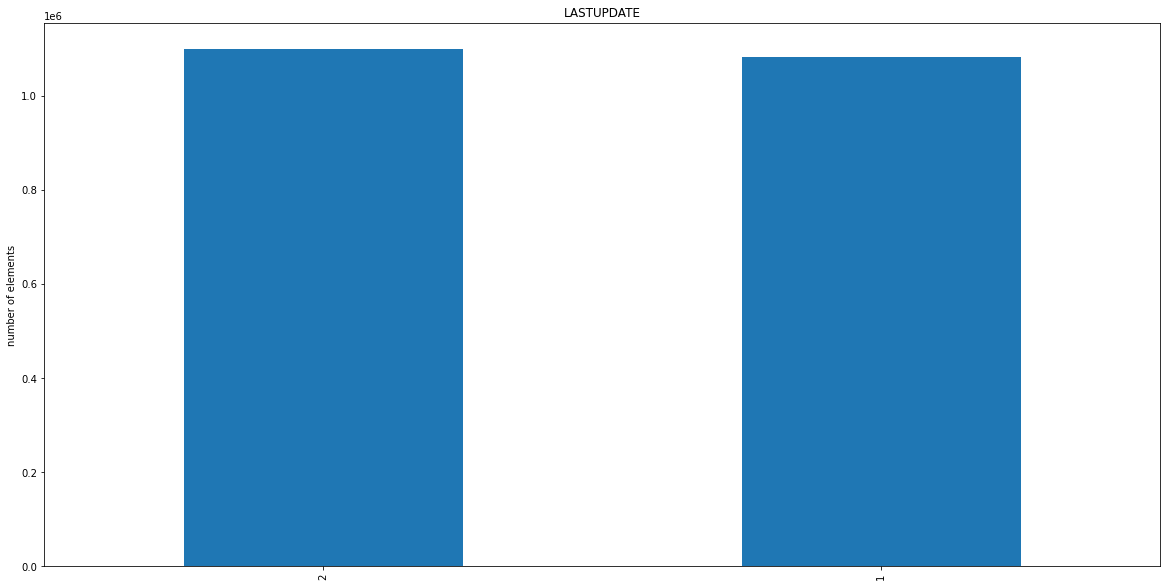

In [22]:
#plotting the number of DIRECTION for dftrips dataset
f = dftrips['DIRECTION'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

<AxesSubplot:ylabel='Frequency'>

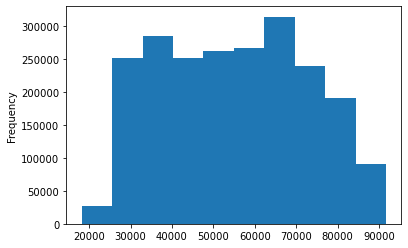

In [23]:
#plotting the hist of PLANNEDTIME_ARR
dftrips['PLANNEDTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

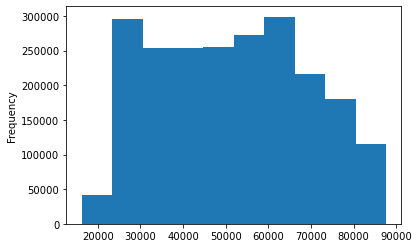

In [24]:
dftrips['PLANNEDTIME_DEP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

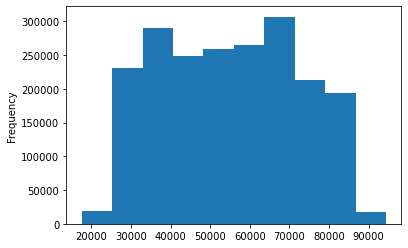

In [25]:
dftrips['ACTUALTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

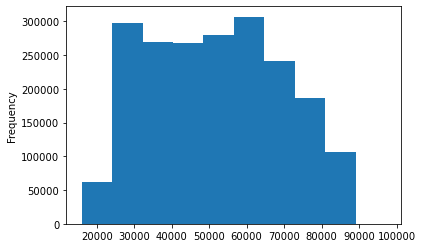

In [26]:
dftrips['ACTUALTIME_DEP'].plot(kind='hist')

### Logical integrity check

In [27]:
# test1 checks the range of date of service
test1 = dftrips[['DAYOFSERVICE']].loc[(dftrips['DAYOFSERVICE']<'2018-1-1') | (dftrips['DAYOFSERVICE']>'2018-12-31')]
test1

,DAYOFSERVICE


In [28]:
#test2 checks if the LINEID matches with the ROUTEID
test2 = dftrips[dftrips.apply(lambda x: x.LINEID in x.ROUTEID, axis = 1) == False]
print("The number of rows failing the test:", test2.shape[0])
test2

The number of rows failing the test: 0


,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


In [29]:
#test3 checks if the actual arriving time will be earlier than the departure time
test3 = dftrips[dftrips['PLANNEDTIME_ARR'] <= dftrips['PLANNEDTIME_DEP']]
test3

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE


In [30]:
#test4 checks if the actual arriving time will be earlier than the departure time
test4 = dftrips[dftrips['ACTUALTIME_ARR'] <= dftrips['ACTUALTIME_DEP']]
test4

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1619,DB,2018-06-21,7029435,150,150_8,1,75653,73800,76232.0,83371.0,BasDef,NaN,NaN,NaN,2018-06-29 15:43:00,",2961346,2961346,"
4473,DB,2018-09-26,7766397,65,65_74,1,38044,34200,38852.0,42653.0,BasDef,NaN,NaN,NaN,2018-10-18 18:01:47,",3086660,3086660,"
42164,DB,2018-09-28,7761061,150,150_8,1,75510,73800,76397.0,76692.0,BasDef,NaN,NaN,NaN,2018-10-18 18:30:27,",2961346,2961346,"
46421,DB,2018-06-19,7021290,43,43_84,1,59845,56400,59314.0,59962.0,BasDef,NaN,NaN,NaN,2018-06-27 10:55:33,",2332167,2332167,"
51585,DB,2018-03-22,6391220,56A,56A_31,1,74509,71100,74755.0,75180.0,BasDef,NaN,NaN,NaN,2018-04-04 08:59:06,",1743040,1743040,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086498,DB,2018-05-18,6761997,39,39_20,1,40565,36120,40745.0,41740.0,BasDef,NaN,NaN,NaN,2018-06-26 09:52:33,",2422852,2422852,"
2104373,DB,2018-07-29,7321713,25A,25A_273,1,74846,72120,75229.0,76777.0,BasDef,NaN,NaN,NaN,2018-08-18 17:20:12,",2420567,2420567,"
2139250,DB,2018-01-08,6091453,41C,41C_78,1,80078,77400,80522.0,80929.0,BasDef,NaN,NaN,NaN,2018-01-16 08:33:19,",1745620,1745620,"
2166972,DB,2018-05-12,6747229,65B,65B_66,2,73630,70200,74556.0,75609.0,BasDef,NaN,NaN,NaN,2018-06-26 08:53:33,",2819186,"


In [31]:
#save the index of failed instances in test4
index_of_test4 = test4.index

The rows above with actual arriving time earlier than the actual departure time is logically unreasonable, which should be dropped in the following process.

## Data Quality Report of 'rt_trips_DB_2018'

'rt_trips_DB_2018' file contains the data of essential information of bus trips. In the following cell I will discuss the findings of each features based on the data understanding processes above.

**DATASOURCE, BASIN:** only one value appears in the column of these features, therefore they are not considered conveying any useful information. 

**DAYOFSERVICE:** Recorded date infromation of bus service. From the plot we can see that there were slightly less bus trips in Nov and Dec of 2018.

**TRIPID:** TRIPID is the ID number of each bus trip. Please note that TRIPID is not the unique ID to identify every single bus trip in dftrips. However, no duplicated TRIPID in a complete service day, indicating that the combination of TRIPID and DAYOFSERVICE is unique.

**LINEID, ROUTEID:** LINEID indicates the line of bus that we are familiar with, i.e 46A, while ROUTEID reveals the different routes that every line of bus could have. For example, bus line 46A has 46A_74, 46A_67, 46A_66, 46A_64 and 46A_73 five different routes in total.

**DIRECTION:** Indicates the direction of each bus trip. and datat is almost even split between 1 and 2. No missing values.

**PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR, ACTUALTIME_DEP :** The planned and acutual arriving and departure times of buses. However, 137207 and 164551 missing values lie in ACTUALTIME_ARR and ACTUALTIME_DEP.

**TENDERLOT, JUSTIFICATIONID:** Almost null value, considered to drop.

**SUPPRESSED:** indicates the planned trips were canceled when SUPPRESSED is 0. missing value may appear in ACTUALTIME_ARR if SUPPRESSED = 0.

**LASTUPDATE, NOTE:** do not consider conveying any useful information for analytics.

# Data Understanding of 'rt_leavetimes_DB_2018.txt'

In [32]:
# selecting the tripid where lineid is 1
trip_1_id_list = dftrips['TRIPID'][dftrips['LINEID'] == '1'].tolist()

In [33]:
trip_1_id_list

[6253554,
 6264630,
 6270757,
 6393789,
 6398499,
 6387807,
 6391079,
 6387644,
 6398497,
 6402965,
 7773565,
 7769275,
 7766387,
 7766185,
 6615355,
 6626028,
 6620871,
 6615353,
 6614525,
 6394412,
 6394410,
 6394418,
 6387817,
 6387812,
 6275478,
 6272524,
 6264622,
 6265246,
 8028396,
 8025474,
 8014829,
 7758234,
 7762741,
 7766192,
 7110687,
 7099510,
 6272532,
 8019886,
 6398844,
 6394483,
 6394477,
 6402970,
 6398502,
 6387648,
 6387811,
 7759756,
 6278691,
 6272530,
 6265250,
 6263295,
 6270755,
 6264628,
 8015851,
 8028399,
 8028449,
 8022946,
 8024652,
 8019877,
 8014832,
 8028401,
 8019879,
 8025479,
 6629712,
 6615342,
 6620858,
 6619966,
 6626015,
 6396369,
 6398755,
 6390141,
 6390143,
 6397635,
 6387709,
 7762730,
 7767759,
 7110681,
 7099725,
 8019875,
 8022944,
 8014830,
 8015849,
 6393788,
 6387804,
 6391076,
 7099506,
 7114650,
 7016655,
 7016669,
 7016670,
 6398753,
 6401008,
 6401011,
 6401012,
 6398501,
 6387809,
 6402969,
 8084256,
 8082776,
 8096016,
 8093182,


In [34]:
# the file 'rt_leavetimes_DB_2018.txt' too big, we want to only load one route
# Our plan is to process the file in chunks and only add a route 1 to the dataframe

# route1_df_list = []
# chunksize = 10 ** 6
# for chunk in pd.read_csv("rt_leavetimes_DB_2018.txt", sep=';', chunksize=chunksize):
#    route1_df_list.append(chunk[chunk['TRIPID'].isin(trip_1_id_list)])

# dfroute1 = pd.concat(route1_df_list)

In [35]:
# saving the route 1 data to a local csv
# dfroute1.to_csv("route_1_leavetimes.csv", index=False)

In [36]:
# loading in the route 1 data from the local csv
dfroute1 = pd.read_csv("route_1_leavetimes.csv", parse_dates=[1, 16], infer_datetime_format=True)

In [37]:
dfroute1.head(10)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
5,DB,2018-01-01,5965964,12,119,70688,70688,70663,70679,2693209,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
6,DB,2018-01-01,5958117,12,119,72488,72488,72539,72539,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
7,DB,2018-01-01,5959109,12,119,74288,74288,74173,74173,2693263,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
8,DB,2018-01-01,5972114,12,119,40187,40187,40096,40111,2693211,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
9,DB,2018-01-01,5959099,12,119,38387,38387,38271,38271,2693263,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [38]:
dfroute1.shape

(1336960, 18)

In [39]:
#Check the STOPPOINTID of route 1

In [40]:
dfroute1["STOPPOINTID"].unique()

array([ 119,   44, 7603,   45,   46,  213,   47,   48,   49,   51,   52,
        265,  271,  340,  350,  351,  352,  353,  354,  355,  356,  357,
        390,  372,  373,  374,  375, 2804,  376,  226,  228,  229,  227,
        230,  231, 1641, 1642,  214, 4432,  377,  378,  380,  225,  385,
        319, 7615,  383,  381,  382, 4451,  384,  387,  388,  393,  371,
        391,  392,  395,  396,  397,  398,  399,  400,  389,  278,   10,
         12,   14,   15,   17,   18,   19,   21, 7602,   85,  203,  204,
        205, 1620,  220,  221,  222,  223,  224])

In [41]:
dfroute1.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
PROGRNUMBER                 int64
STOPPOINTID                 int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                   int64
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                      float64
dtype: object

In [42]:
#Convert the datatype of dfroute1 into proper type
categorical_columns = dfroute1[['DATASOURCE','NOTE']].columns
continuous_columns = dfroute1[['TRIPID','PROGRNUMBER','STOPPOINTID','PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP','VEHICLEID','PASSENGERS','PASSENGERSIN','PASSENGERSOUT','DISTANCE','SUPPRESSED','JUSTIFICATIONID']].columns
datetime_columns = dfroute1[['DAYOFSERVICE', 'LASTUPDATE']].columns

for column in categorical_columns:
    dfroute1[column] = dfroute1[column].astype('category')  

# for column in datetime_columns:
#     dfroute1[column] = pd.to_datetime(dftrips[column]).astype('datetime64')  
    
dfroute1.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
PROGRNUMBER                 int64
STOPPOINTID                 int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                   int64
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

## Data Understanding

In [43]:
#Check duplicated row
dfroute1.duplicated().sum()

0

In [44]:
#Check null value
dfroute1.isnull().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
PROGRNUMBER              0
STOPPOINTID              0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR           0
ACTUALTIME_DEP           0
VEHICLEID                0
PASSENGERS         1336960
PASSENGERSIN       1336960
PASSENGERSOUT      1336960
DISTANCE           1336960
SUPPRESSED         1331691
JUSTIFICATIONID    1331691
LASTUPDATE               0
NOTE               1336960
dtype: int64

As we can see above, the columns of PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE, SUPPERSSED, JUSTIFICATIONID and NOTE only contain null values, therefore, they should be dropped when cleaning the data.

In [45]:
# Print table with categorical statistics
dfroute1.select_dtypes(['category']).describe().T

,count,unique,top,freq
DATASOURCE,1336960,1,DB,1336960
NOTE,0,0,NaN,NaN


In [46]:
# Print table with continuous statistics
dfroute1.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,1336960.0,7.224377e+06,756116.250060,5956084.0,6612779.0,7164073.0,8068633.0,8587372.0
PROGRNUMBER,1336960.0,2.096706e+01,12.216953,1.0,10.0,20.0,31.0,43.0
STOPPOINTID,1336960.0,6.917439e+02,1501.757257,10.0,214.0,353.0,388.0,7615.0
PLANNEDTIME_ARR,1336960.0,5.416489e+04,16802.812165,23400.0,40114.0,53811.0,67518.0,86160.0
PLANNEDTIME_DEP,1336960.0,5.416489e+04,16802.812165,23400.0,40114.0,53811.0,67518.0,86160.0
ACTUALTIME_ARR,1336960.0,5.431012e+04,16809.252438,22841.0,40289.0,53990.0,67723.0,87714.0
ACTUALTIME_DEP,1336960.0,5.432687e+04,16809.113230,22841.0,40307.0,54005.0,67741.0,87714.0
VEHICLEID,1336960.0,2.228293e+06,620412.872609,1000158.0,1932368.0,2534796.0,2693229.0,3265719.0


In [47]:
# Print table with continuous statistics
dfroute1.select_dtypes(['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
PASSENGERS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSIN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSOUT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTANCE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUPPRESSED,5269.0,2.285064e-01,4.199103e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
JUSTIFICATIONID,5269.0,3.874144e+17,1.944377e+17,181761.0,4.849814e+17,4.849814e+17,4.849814e+17,4.849814e+17


In [48]:
#Check the number of unique trip IDs
print("Number of unique trip IDs:", len(dfroute1['TRIPID'].unique()))

Number of unique trip IDs: 10549


In [49]:
#Check the value counts for DAYOFSERVICE
print(dfroute1['DAYOFSERVICE'].value_counts())
print("Number of unique Day of Service:", len(dfroute1['DAYOFSERVICE'].unique()))

2018-11-19    5730
2018-10-30    5727
2018-10-24    5716
2018-12-12    5705
2018-11-05    5702
              ... 
2018-08-19    2392
2018-03-10    2344
2018-06-30    2257
2018-02-28    2133
2018-03-03     826
Name: DAYOFSERVICE, Length: 360, dtype: int64
Number of unique Day of Service: 360


In [50]:
#check the value counts for PROGRNUMBER
dfroute1['PROGRNUMBER'].value_counts()

19    33959
18    33958
17    33953
14    33948
15    33934
16    33928
13    33897
12    33891
11    33885
20    33879
10    33879
9     33862
8     33833
7     33800
21    33736
6     33689
5     33628
4     33612
1     33515
3     33322
2     33183
22    31620
23    29414
27    29153
28    29150
26    29141
29    29137
30    29137
25    29107
24    29105
32    29087
33    29086
34    29081
31    29079
35    29078
36    29074
37    29025
38    28928
39    28883
40    28840
42    28835
41    28811
43    14898
Name: PROGRNUMBER, dtype: int64

<AxesSubplot:>

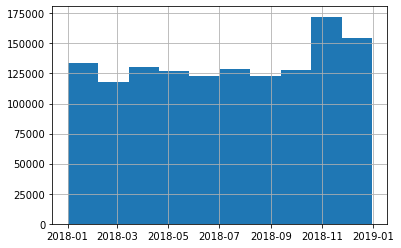

In [51]:
# plotting number of DAYOFSERVICE for route 1 over 2018
dfroute1['DAYOFSERVICE'].hist()

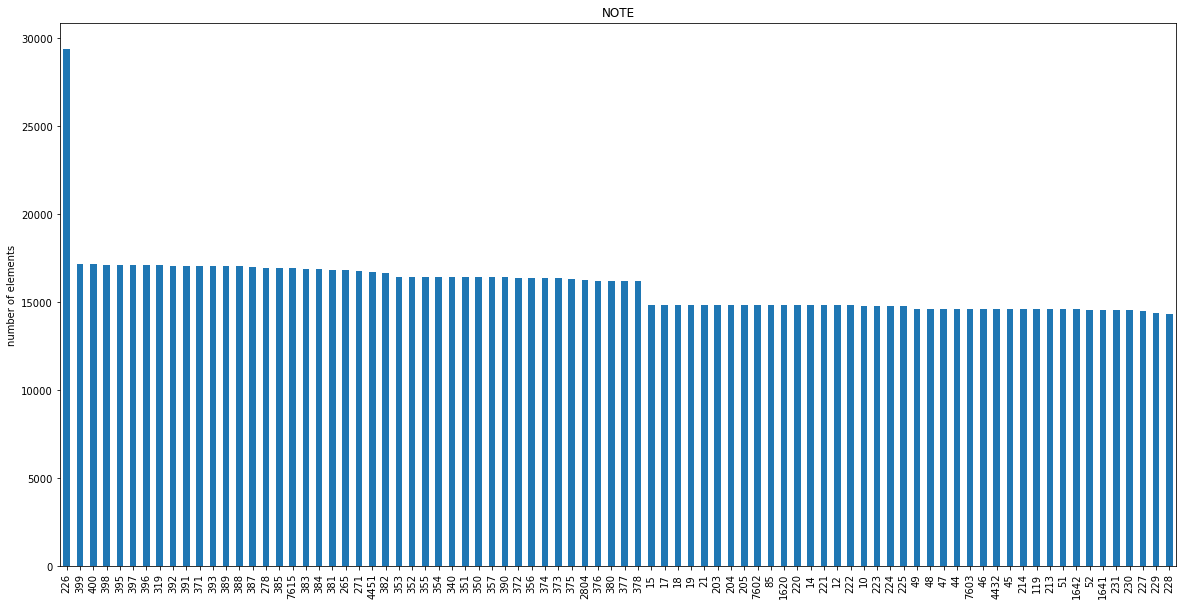

In [52]:
#plotting the number of STOPPOINTID for route 1
f = dfroute1['STOPPOINTID'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

In the following cells, I randomly chose a TRIPID for some simple logical tests.

In [53]:
dfroute1.loc[dfroute1['TRIPID'] == 5958117]

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
6,DB,2018-01-01,5958117,12,119,72488,72488,72539,72539,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
64,DB,2018-01-01,5958117,14,7603,72557,72557,72603,72603,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
91,DB,2018-01-01,5958117,15,45,72590,72590,72620,72620,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
121,DB,2018-01-01,5958117,16,46,72648,72648,72654,72664,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
149,DB,2018-01-01,5958117,17,47,72718,72718,72714,72714,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
176,DB,2018-01-01,5958117,18,48,72762,72762,72735,72735,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
207,DB,2018-01-01,5958117,19,49,72826,72826,72779,72779,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
234,DB,2018-01-01,5958117,20,51,72927,72927,72851,72851,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
263,DB,2018-01-01,5958117,21,52,72982,72982,72873,72884,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
291,DB,2018-01-01,5958117,22,265,73081,73081,73038,73038,2172293,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


In [54]:
dftrips.loc[dftrips['TRIPID'] == 5958117]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
2093353,DB,2018-01-01,5958117,1,1_37,1,74388,72000,74226.0,72023.0,BasDef,NaN,NaN,NaN,2018-01-08 17:21:10,",2856412,"


Question: why doesn't the Date of service '2018-01-01' match with the dates in dfroute1 when the TRIPID is the same?

In [55]:
dfroute1['PROGRNUMBER'].loc[dfroute1['TRIPID'] == 5958117].value_counts()

1     1
32    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
33    1
2     1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
23    1
22    1
21    1
20    1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
42    1
Name: PROGRNUMBER, dtype: int64

From the cell above we know that even the TRIPID duplicated in the dfroute1, each row has unique PROGRNUMBER.

We will plot arr times and dep times in the following cells.

<AxesSubplot:ylabel='Frequency'>

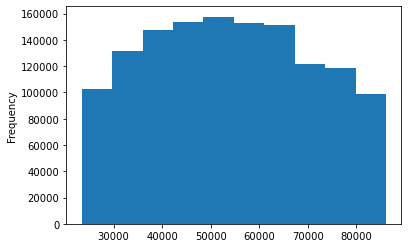

In [56]:
dfroute1['PLANNEDTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

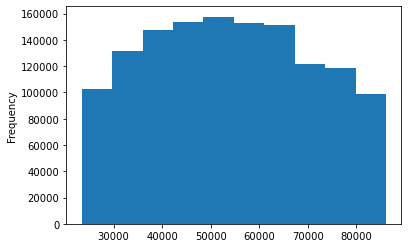

In [57]:
dfroute1['PLANNEDTIME_DEP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

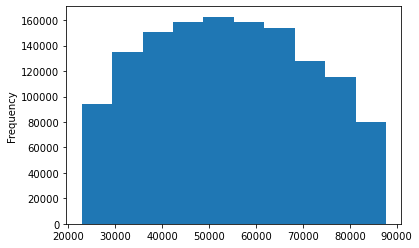

In [58]:
dfroute1['ACTUALTIME_ARR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

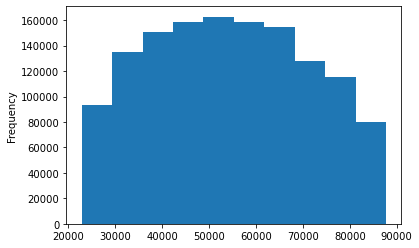

In [59]:
dfroute1['ACTUALTIME_DEP'].plot(kind='hist')

**Please note that more processes will be implemented on dfroute1 for further understanding.**

## Data Understanding of 'weatherdata2018'

Import the data 'weatherdata2018'

In [60]:
dfweather = pd.read_csv('weatherdata2018.csv')

In [61]:
# Check how many rows and columns this dataframe has
print("number of rows and columns:", dfweather.shape)

number of rows and columns: (9036, 28)


In [62]:
dfweather.head(10)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.93,...,18.0,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.68,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,18.5,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.33,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
5,1514782800,2018-01-01 05:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.22,0.29,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
6,1514786400,2018-01-01 06:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,5.00,9999.0,2.36,0.44,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
7,1514790000,2018-01-01 07:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.46,9999.0,2.33,0.34,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
8,1514793600,2018-01-01 08:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.16,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
9,1514797200,2018-01-01 09:00:00 +0000 UTC,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.52,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


In [63]:
dfweather.dtypes

dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [64]:
#Slicing the data 'in dt_iso'
dfweather['dt_iso'] = dfweather['dt_iso'].str.slice(0,-10)

In [65]:
dfweather.head(10)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.93,...,18.0,NaN,NaN,NaN,NaN,40,520,Rain,light intensity shower rain,09n
1,1514768400,2018-01-01 01:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-1.68,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
2,1514772000,2018-01-01 02:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,18.5,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.47,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,1514779200,2018-01-01 04:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.40,-0.33,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
5,1514782800,2018-01-01 05:00:00,0,Custom location,53.345035,-6.267261,5.39,9999.0,2.22,0.29,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
6,1514786400,2018-01-01 06:00:00,0,Custom location,53.345035,-6.267261,5.00,9999.0,2.36,0.44,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
7,1514790000,2018-01-01 07:00:00,0,Custom location,53.345035,-6.267261,4.46,9999.0,2.33,0.34,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
8,1514793600,2018-01-01 08:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.16,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
9,1514797200,2018-01-01 09:00:00,0,Custom location,53.345035,-6.267261,4.39,9999.0,2.26,-0.52,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


In [66]:
#Convert the data type into properate type.
dfweather['dt_iso'] = dfweather['dt_iso'].astype('datetime64')
dfweather['city_name'] = dfweather['city_name'].astype('category')
dfweather['weather_main'] = dfweather['weather_main'].astype('category')
dfweather['weather_description'] = dfweather['weather_description'].astype('category')
dfweather['weather_icon'] = dfweather['weather_icon'].astype('category')

In [67]:
dfweather.dtypes

dt                              int64
dt_iso                 datetime64[ns]
timezone                        int64
city_name                    category
lat                           float64
lon                           float64
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
temp_min                      float64
temp_max                      float64
pressure                        int64
sea_level                     float64
grnd_level                    float64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
rain_3h                       float64
snow_1h                       float64
snow_3h                       float64
clouds_all                      int64
weather_id                      int64
weather_main                 category
weather_desc

In [68]:
#Checking the null value of each column
dfweather.isna().sum()

dt                        0
dt_iso                    0
timezone                  0
city_name                 0
lat                       0
lon                       0
temp                      0
visibility               40
dew_point                 0
feels_like                0
temp_min                  0
temp_max                  0
pressure                  0
sea_level              9036
grnd_level             9036
humidity                  0
wind_speed                0
wind_deg                  0
wind_gust              8178
rain_1h                7268
rain_3h                9036
snow_1h                8958
snow_3h                9036
clouds_all                0
weather_id                0
weather_main              0
weather_description       0
weather_icon              0
dtype: int64

In [69]:
# Print table with categorical statistics
dfweather.select_dtypes(['category']).describe().T

,count,unique,top,freq
city_name,9036,1,Custom location,9036
weather_main,9036,9,Clouds,5430
weather_description,9036,24,broken clouds,3151
weather_icon,9036,17,04d,1731


In [70]:
# Print table with continuous statistics
dfweather.select_dtypes(include=['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
dt,9036.0,1.530441e+09,9.141831e+06,1.514765e+09,1.522482e+09,1.530437e+09,1.538385e+09,1.546211e+09
timezone,9036.0,2.123904e+03,1.770715e+03,0.000000e+00,0.000000e+00,3.600000e+03,3.600000e+03,3.600000e+03
lat,9036.0,5.334504e+01,4.803535e-12,5.334504e+01,5.334504e+01,5.334504e+01,5.334504e+01,5.334504e+01
lon,9036.0,-6.267261e+00,7.398936e-13,-6.267261e+00,-6.267261e+00,-6.267261e+00,-6.267261e+00,-6.267261e+00
temp,9036.0,1.040274e+01,5.487594e+00,-4.610000e+00,6.390000e+00,1.035500e+01,1.439000e+01,2.692000e+01
visibility,8996.0,9.440103e+03,1.683663e+03,1.000000e+02,9.999000e+03,9.999000e+03,9.999000e+03,1.000000e+04
dew_point,9036.0,7.004841e+00,4.672943e+00,-7.990000e+00,3.440000e+00,7.290000e+00,1.030000e+01,1.888000e+01
feels_like,9036.0,8.543949e+00,6.970337e+00,-1.161000e+01,3.260000e+00,9.340000e+00,1.389000e+01,2.649000e+01
temp_min,9036.0,1.003184e+01,5.521898e+00,-4.640000e+00,6.360000e+00,9.360000e+00,1.404000e+01,2.636000e+01
temp_max,9036.0,1.107760e+01,5.602569e+00,-4.440000e+00,7.332500e+00,1.056000e+01,1.496500e+01,2.924000e+01


In [71]:
# Print table with categorical statistics
dfweather.select_dtypes(['category']).describe().T

,count,unique,top,freq
city_name,9036,1,Custom location,9036
weather_main,9036,9,Clouds,5430
weather_description,9036,24,broken clouds,3151
weather_icon,9036,17,04d,1731


<AxesSubplot:>

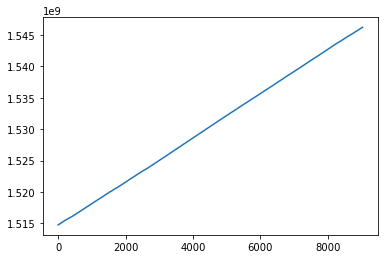

In [72]:
dfweather['dt'].plot()

In [73]:
dfweather['city_name'].unique()

['Custom location']
Categories (1, object): ['Custom location']

In [74]:
dfweather['timezone'].unique()

array([   0, 3600])

<AxesSubplot:>

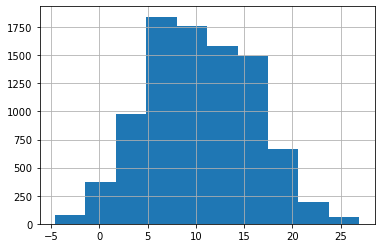

In [75]:
dfweather['temp'].hist()

<AxesSubplot:>

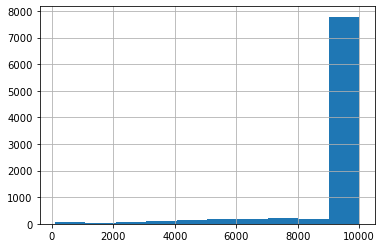

In [76]:
dfweather['visibility'].hist()

<AxesSubplot:>

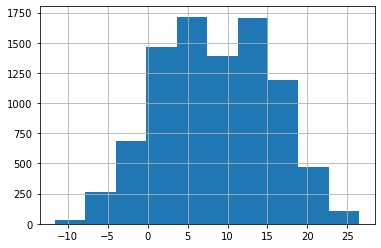

In [77]:
dfweather['feels_like'].hist()

<AxesSubplot:>

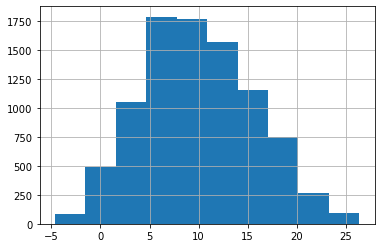

In [78]:
dfweather['temp_min'].hist()

<AxesSubplot:>

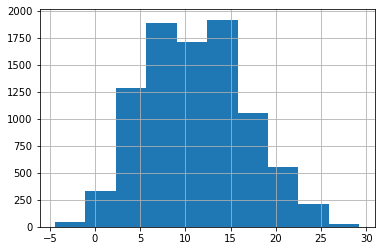

In [79]:
dfweather['temp_max'].hist()

<AxesSubplot:>

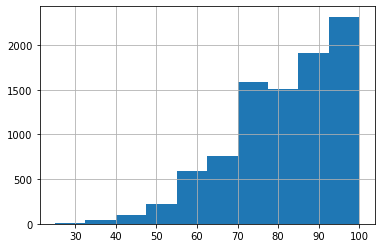

In [80]:
dfweather['humidity'].hist()

<AxesSubplot:>

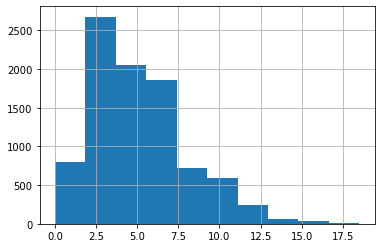

In [81]:
dfweather['wind_speed'].hist()

<AxesSubplot:>

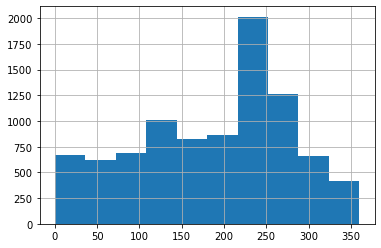

In [82]:
dfweather['wind_deg'].hist()

<AxesSubplot:>

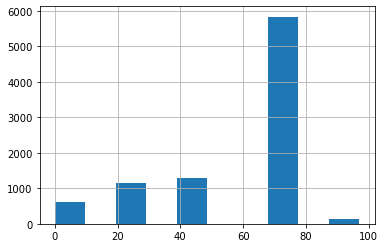

In [83]:
dfweather['clouds_all'].hist()

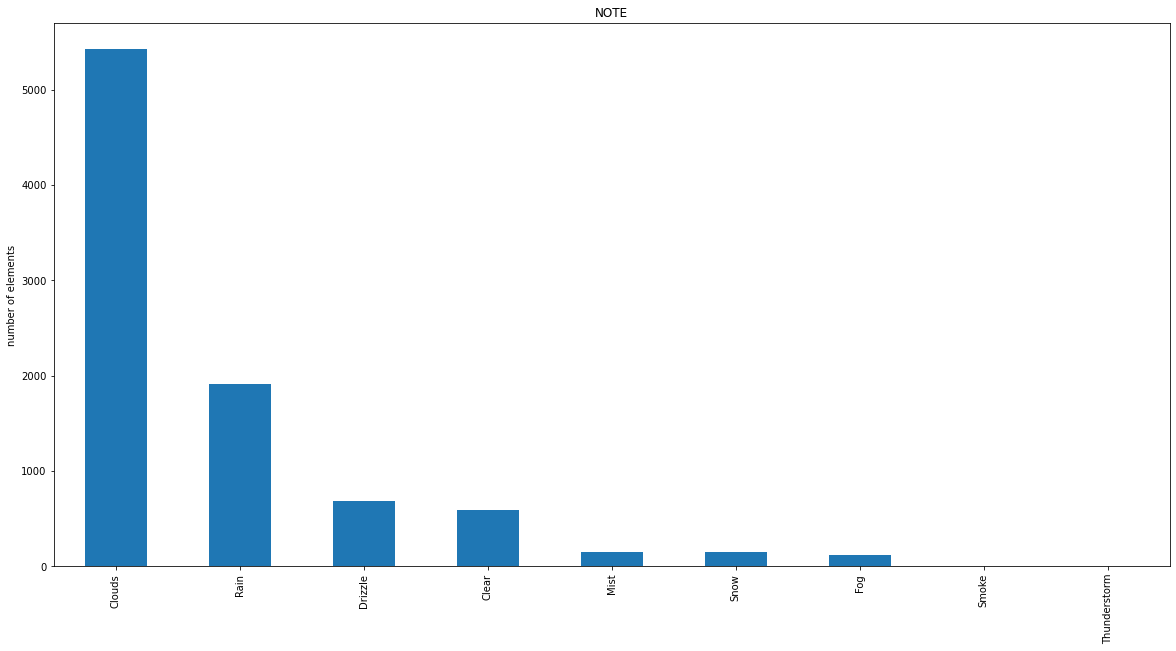

In [84]:
f = dfweather['weather_main'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

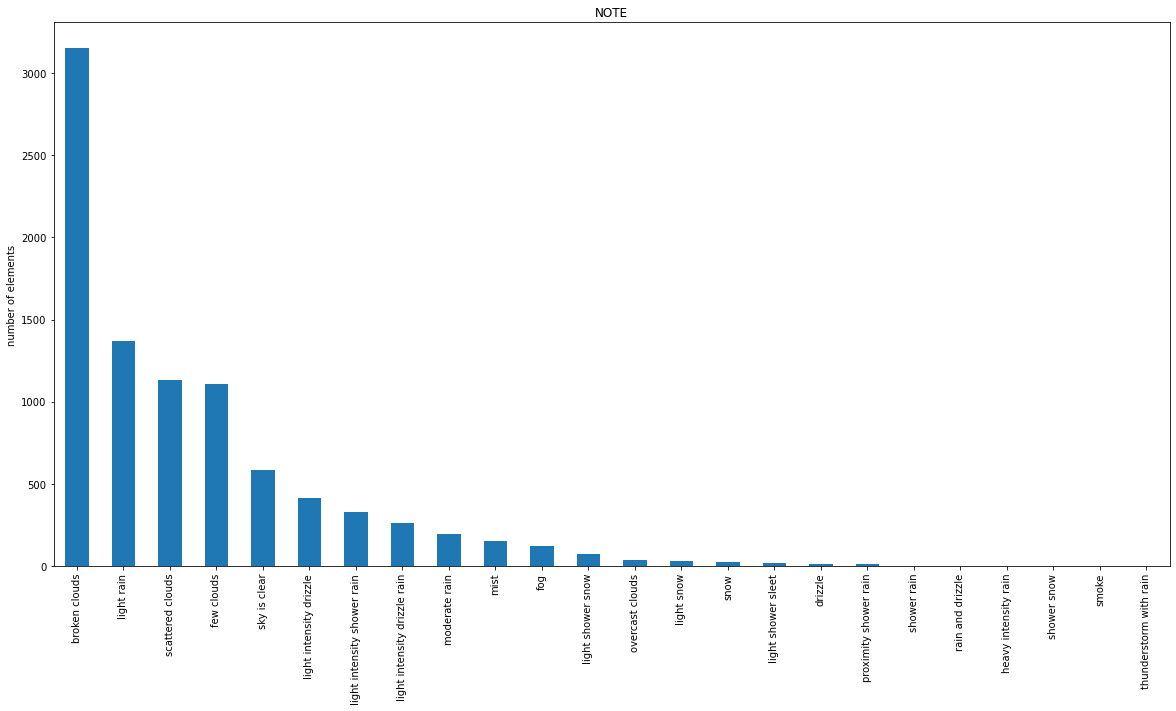

In [85]:
f = dfweather['weather_description'].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(20,10))
plt.ylabel('number of elements')
plt.show()

## Data Quality Report of weather data

After the data understanding processes above, I consider keeping the following features which is useful for model training:

- dt_iso
- temp
- visibility
- dew_point                     float64
- feels_like                    float64
- pressure                        int64
- humidity                        int64
- wind_speed                    float64
- wind_deg                        int64
- wind_gust                     float64
- rain_1h                       float64
- snow_1h                       float64
- clouds_all                      int64
- weather_main                 category
- weather_description          category


# Data Preperation of dftrips dataframe.

In [86]:
# Dropping DATASOURCE, BASIN, TENDERLOT, LASTUPDATE, NOTE and JUSTIFICATIONID
dftrips = dftrips.drop(columns=['DATASOURCE', 'BASIN', 'TENDERLOT', 'LASTUPDATE', 'NOTE', 'JUSTIFICATIONID'])
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN


In [87]:
#Dropping the instances failed in test4
dftrips = dftrips.drop(index = index_of_test4)

In [88]:
#reset the index to
dftrips.reset_index(drop=True, inplace=True)

In [89]:
#Calculate the trip time of each trip
#Use the planned date instead if the actual data is missing.
dftrips['TRIPTIME(min)'] = 0
for i in range(len(dftrips)):
    if (np.isnan(dftrips["ACTUALTIME_ARR"][i])) | (np.isnan(dftrips["ACTUALTIME_DEP"][i])):
        dftrips['TRIPTIME(min)'][i] = (dftrips['PLANNEDTIME_ARR'][i] - dftrips['PLANNEDTIME_DEP'][i]) // 60
    else:
        dftrips['TRIPTIME(min)'][i] = (dftrips['ACTUALTIME_ARR'][i] - dftrips['ACTUALTIME_DEP'][i]) // 60
    

dftrips.head()

<ipython-input-89-0d6d34679bc8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['TRIPTIME(min)'][i] = (dftrips['ACTUALTIME_ARR'][i] - dftrips['ACTUALTIME_DEP'][i]) // 60
<ipython-input-89-0d6d34679bc8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['TRIPTIME(min)'][i] = (dftrips['PLANNEDTIME_ARR'][i] - dftrips['PLANNEDTIME_DEP'][i]) // 60


,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min)
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,48
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,67
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,70
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,67
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,51


In [90]:
dftrips['TRIPTIME(min)'].isna().sum()

0

In [91]:
#Adding the feature of hour of the day.
#Here we will average the time values of 'ACTUALTIME_ARR' and 'ACTUALTIME_DEP'
dftrips['HOUROFDAY'] = (((dftrips['PLANNEDTIME_ARR'] + dftrips['PLANNEDTIME_DEP']) / 2)//3600)
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min),HOUROFDAY
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,48,23.0
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,67,7.0
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,70,9.0
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,67,15.0
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,51,23.0


In [92]:
dftrips['HOUROFDAY'].value_counts()

17.0    160179
8.0     158821
18.0    145099
16.0    140464
9.0     134291
13.0    130280
7.0     129831
15.0    128495
14.0    127069
10.0    126411
12.0    124981
11.0    124787
19.0    120853
20.0    100792
21.0     93101
23.0     91548
22.0     87990
6.0      51746
5.0       3404
24.0      2289
4.0        103
Name: HOUROFDAY, dtype: int64

In [93]:
dftrips['HOUROFDAY'].isna().sum()

0

In [94]:
# test = dftrips[dftrips['HOUROFDAY'] >= 24]
# index = test.index
# dftrips[dftrips['HOUROFDAY'] >= 24]

In [95]:
# print(index)

In [96]:
#Check if the value of 'HOUROFDAY' is greater of equal to 24, increment the value of 'DAYOFSERVICE'
for i in range(len(dftrips['HOUROFDAY'])):
    if dftrips['HOUROFDAY'][i] >=24:
        dftrips['HOUROFDAY'][i] -= 24
        dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.DateOffset(1)

dftrips[(dftrips['HOUROFDAY'] >= 24)]

<ipython-input-96-faf30a52135f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['HOUROFDAY'][i] -= 24
<ipython-input-96-faf30a52135f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.DateOffset(1)


,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min),HOUROFDAY


In [97]:
dftrips.loc[1128]


DAYOFSERVICE       2018-04-12 00:00:00
TRIPID                         6618375
LINEID                             33B
ROUTEID                         33B_56
DIRECTION                            1
PLANNEDTIME_ARR                  87084
PLANNEDTIME_DEP                  85800
ACTUALTIME_ARR                 87047.0
ACTUALTIME_DEP                 85811.0
SUPPRESSED                         NaN
TRIPTIME(min)                       20
HOUROFDAY                          0.0
Name: 1128, dtype: object

In [98]:
#Adding the feature of day of the week.
s = pd.date_range('2018-1-1', '2018-12-31', freq='D').to_series()
dftrips['DAYOFWEEK'] = dftrips['DAYOFSERVICE'].dt.dayofweek
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min),HOUROFDAY,DAYOFWEEK
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,48,23.0,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,67,7.0,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,70,9.0,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,67,15.0,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,51,23.0,2


In [99]:
#Adding the feature of month of the year.
dftrips['MONTHOFYEAR'] = dftrips['DAYOFSERVICE'].dt.month
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,48,23.0,2,2
1,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,67,7.0,2,2
2,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,70,9.0,2,2
3,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,67,15.0,2,2
4,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,51,23.0,2,2


In [100]:
#Adding the information of 'HOUROFDAY' to the 'DAYOFSERVICE' column
for i in range(len(dftrips['DAYOFSERVICE'])):
    dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.Timedelta(hours=dftrips['HOUROFDAY'][i])
    
dftrips['DAYOFSERVICE'].head()

<ipython-input-100-8d7946820e50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrips['DAYOFSERVICE'][i] = dftrips['DAYOFSERVICE'][i] + pd.Timedelta(hours=dftrips['HOUROFDAY'][i])


0   2018-02-07 23:00:00
1   2018-02-07 07:00:00
2   2018-02-07 09:00:00
3   2018-02-07 15:00:00
4   2018-02-07 23:00:00
Name: DAYOFSERVICE, dtype: datetime64[ns]

In [101]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07 23:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,48,23.0,2,2
1,2018-02-07 07:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,67,7.0,2,2
2,2018-02-07 09:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,70,9.0,2,2
3,2018-02-07 15:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,67,15.0,2,2
4,2018-02-07 23:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,51,23.0,2,2


Now we can see that the data of dftrips is cleaned and ready to get it mergered with the weather data


## Data Preperation of dfweather dataframe

In [102]:
drop_column = ['dt', 'timezone', 'city_name','lat','lon','temp_min','temp_max','sea_level','grnd_level','rain_3h', 'snow_3h','weather_id','weather_icon']
dfweather = dfweather.drop(columns=drop_column)
dfweather.head()

,dt_iso,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 00:00:00,4.39,9999.0,2.26,-1.93,990,86,12.9,240,18.0,NaN,NaN,40,Rain,light intensity shower rain
1,2018-01-01 01:00:00,4.39,9999.0,2.26,-1.68,990,86,11.8,240,NaN,NaN,NaN,75,Rain,light intensity shower rain
2,2018-01-01 02:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,18.5,NaN,NaN,40,Clouds,scattered clouds
3,2018-01-01 03:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2018-01-01 04:00:00,5.39,9999.0,2.40,-0.33,989,81,11.8,240,NaN,NaN,NaN,40,Clouds,scattered clouds


In [103]:
#Remane 'dt_iso' into 'DAYOFSERVICE'
dfweather = dfweather.rename(columns={'dt_iso': 'DAYOFSERVICE'})
dfweather.head()

,DAYOFSERVICE,temp,visibility,dew_point,feels_like,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-01-01 00:00:00,4.39,9999.0,2.26,-1.93,990,86,12.9,240,18.0,NaN,NaN,40,Rain,light intensity shower rain
1,2018-01-01 01:00:00,4.39,9999.0,2.26,-1.68,990,86,11.8,240,NaN,NaN,NaN,75,Rain,light intensity shower rain
2,2018-01-01 02:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,18.5,NaN,NaN,40,Clouds,scattered clouds
3,2018-01-01 03:00:00,5.39,9999.0,2.40,-0.47,990,81,12.4,240,NaN,NaN,NaN,40,Clouds,scattered clouds
4,2018-01-01 04:00:00,5.39,9999.0,2.40,-0.33,989,81,11.8,240,NaN,NaN,NaN,40,Clouds,scattered clouds


In [104]:
dfweather.dtypes

DAYOFSERVICE           datetime64[ns]
temp                          float64
visibility                    float64
dew_point                     float64
feels_like                    float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
wind_gust                     float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                 category
weather_description          category
dtype: object

In [105]:
dftrips.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,TRIPTIME(min),HOUROFDAY,DAYOFWEEK,MONTHOFYEAR
0,2018-02-07 23:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,48,23.0,2,2
1,2018-02-07 07:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,NaN,67,7.0,2,2
2,2018-02-07 09:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,NaN,70,9.0,2,2
3,2018-02-07 15:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,NaN,67,15.0,2,2
4,2018-02-07 23:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,51,23.0,2,2


In the following cells, I will try to merge the weather data into the dftrips dataframe.

In [106]:
# merging dftrips data with weather data (merge on date and hour, keep temp, wind_speed and w_main dummies)
dftrips_new = dftrips.merge(dfweather, on=['DAYOFSERVICE'])


In [107]:
dftrips_new.head()

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,...,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,snow_1h,clouds_all,weather_main,weather_description
0,2018-02-07 23:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,NaN,...,1015,87,7.2,220,NaN,NaN,NaN,75,Drizzle,light intensity drizzle
1,2018-02-07 23:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,NaN,...,1015,87,7.2,220,NaN,NaN,NaN,75,Drizzle,light intensity drizzle
2,2018-02-07 23:00:00,6259641,59,59_10,1,84864,84000,84890.0,84076.0,NaN,...,1015,87,7.2,220,NaN,NaN,NaN,75,Drizzle,light intensity drizzle
3,2018-02-07 23:00:00,6247763,77A,77A_29,1,86470,82800,NaN,82797.0,NaN,...,1015,87,7.2,220,NaN,NaN,NaN,75,Drizzle,light intensity drizzle
4,2018-02-07 23:00:00,6259918,16,16_20,1,85182,81000,84667.0,80996.0,NaN,...,1015,87,7.2,220,NaN,NaN,NaN,75,Drizzle,light intensity drizzle


In [108]:
dftrips_new.shape

(2249788, 28)

In [109]:
#Save the dftrips_new to a local file
dftrips_new.to_csv("trips_readyformodeling.csv", index=False)